[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - Course Dataset

In [ ]:
!pip install datasets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
!pip install transformers[sentencepiece] datasets

## Datasets library

In [ ]:
#from datasets import load_metric  # Use load_metric instead of list_metrics
#load_metric()

In [ ]:
from datasets import load_dataset

course = load_dataset("kkotkar1/course-reviews")
course

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/4.10M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/80263 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/26755 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 80263
    })
    test: Dataset({
        features: ['label', 'review'],
        num_rows: 26755
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [ ]:
course['train'][100]

{'label': 5,
 'review': 'This course change me the views on 3D printing and their revolution.'}

In [ ]:
course['test'][:3]

{'label': [5, 5, 3],
 'review': ['Its great',
  'Provides a useful brief, easy to follow summary on initiating and planning projects.',
  'Material is very detailed which is both a positive and negative. It gets a little redundant and some things are just common sense. You can tell the instructor is trying to be upbeat but is very clearly reading off of cue cards so its a little flat. For a free course you get a lot of information and it is very easy to get a 100 on every quiz.']}

In [ ]:
course['train'] = course['train'].shuffle(seed=1).select(range(5000))
course['train']

Dataset({
    features: ['label', 'review'],
    num_rows: 5000
})

In [ ]:
course_train_validation = course['train'].train_test_split(train_size=0.8)
course_train_validation

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['label', 'review'],
        num_rows: 1000
    })
})

In [ ]:
course_train_validation['test']

Dataset({
    features: ['label', 'review'],
    num_rows: 1000
})

In [ ]:
course_train_validation['validation'] = course_train_validation.pop('test')
course_train_validation

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['label', 'review'],
        num_rows: 1000
    })
})

In [ ]:
course.update(course_train_validation)
course

DatasetDict({
    train: Dataset({
        features: ['label', 'review'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['label', 'review'],
        num_rows: 26755
    })
    validation: Dataset({
        features: ['label', 'review'],
        num_rows: 1000
    })
})

In [ ]:
course['test'] = course['test'].shuffle(seed=1).select(range(1000))
course['test']

Dataset({
    features: ['label', 'review'],
    num_rows: 1000
})

In [ ]:
#course['unsupervised'][:3]

In [ ]:
#course.pop('unsupervised')
#course

## Overview of Course Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [ ]:
course.set_format('pandas')
df = course['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,label,review
200,5,Thank you very much for your course!Im not an English teacher and I took the first course of this specialization just because I wanted to practice my English. But since that moment Ive used any opportunity to listen to Jessica Cinco and Dr. Shane...
1078,4,Awesome course for machine learning. require hard work and dedication. contains all major machine learning concepts.
610,5,"Interesting, diverse and deals with compex subjects. Highly enjoyable!"
2159,4,"In general, an excellent course, taught by competent professors. I believe that in the main this course does very well in achieving its objective of knowledge transfer. However, having experienced it, there were parts where the professor was demo..."
1169,5,"really great course, I highly recommend this course to anyone wanting"
2448,4,It is helpful for fresh student and student who study in other languages than their own native mother language. Prepare you to be familiar with lecture and provid you clues to deal with incomprehensible situations.
2938,1,This is a lie. I do everything. I complete week 2 and now i come back to watch videos about week 3 and i see that i dont do anything.Can you imagine ?Good job guyz.
813,5,Very helpful and exercises are very apt.
1268,5,This is an awesome experience and a fine way of learning.
870,5,"A Very informative course that makes ones mind open that rapid technological changes are not enough to put peer presure on the policy making governing departments, rather an input at each level (citizens & Public) and thinking at broader aspect c..."


In [ ]:
df.loc[100, 'review']

'I would like to thank professor Tobias Kretschmer and his team at LMU for teaching me this course. Thank you for giving me a chance to learn those wonderful things free online.'

In [ ]:
df['review'] = df.review.str.replace('<br />', '')
df.loc[0, 'review']

'On of the most exciting fields today - Machine Learning - has been taught so very comprehensively by Professor Ang , that this course becomes almost mandatory to complete in order to gain insight and get the basics of this field. The BEST course ever. Professor Ang had my attention to the very last lecture and this emphasizes on how brilliantly this course has been designed and taught by him. Kudos to the mentors who guided everyone through this process.'

In [ ]:
df['label'] = df['label'] - 1

In [ ]:
df.label.value_counts()

,count
label,
4,3030
3,652
2,182
0,72
1,64


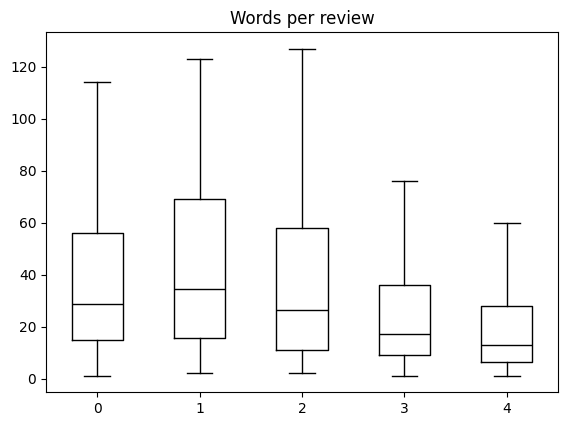

In [ ]:
df["Words per review"] = df["review"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# 0 is negative
# 1 is positive
df[df.review.str.len() < 200]

,label,review,Words per review
1,4,"Very useful , Thank you.",5
2,4,"Great set of programing tools to solve many different problems, including working with big amounts of data.",17
3,4,great and cool,3
5,4,A very good and user friendly course . The practical examples are of great help.,15
6,2,Instruction was through watching other characters designers talk about their process.,11
...,...,...,...
3993,3,Good overview of Data Science but lacking a bit of meat.,11
3994,4,Good explanation to the core components,6
3996,4,It is a good course for the beginner in machine learning field.,12
3998,4,"Thought provocative, challenging and entertaining journey through time, space and mind.",11


In [ ]:
course.reset_format()

## Tokenizer

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["review"], padding=True, truncation=True)

course_encoded = course.map(tokenize_function, batched=True, batch_size=None)
course_encoded

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [ ]:
print(course_encoded['train'][20])

{'label': 5, 'review': 'Very very interesting course!', 'input_ids': [101, 6424, 1304, 5426, 1736, 106, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Tiny Dataset

In [ ]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageTextToText',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForKeypointDetection',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 '

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import DatasetDict

tiny_course = DatasetDict()
tiny_course['train'] = course['train'].shuffle(seed=1).select(range(100))
tiny_course['validation'] = course['validation'].shuffle(seed=1).select(range(20))
tiny_course['test'] = course['test'].shuffle(seed=1).select(range(20))

tiny_course_encoded = tiny_course.map(tokenize_function, batched=True, batch_size=None)
tiny_course_encoded

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 100
    })
    validation: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 20
    })
    test: Dataset({
        features: ['label', 'review', 'input_ids', 'attention_mask'],
        num_rows: 20
    })
})

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 4
logging_steps = len(tiny_course_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-course-reviews"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_course_encoded["train"],
                  eval_dataset=tiny_course_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-30-e10ff04a046c>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: trilokgoel (trilokgoel-liverpool-john-moores-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.417800,1.029564
2,0.841600,0.866723


In [ ]:
preds = trainer.predict(tiny_course_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.7771337 , -0.43620968, -0.69810367, -0.5340767 ,  0.37475008,
         2.024089  ],
       [-0.6991225 , -0.45529786, -0.8661933 , -0.47992608,  0.3895919 ,
         1.915006  ],
       [-0.7744512 , -0.475447  , -0.73990583, -0.5485132 ,  0.42357203,
         1.9947282 ],
       [-0.6427965 , -0.3609388 , -0.7243895 , -0.488313  ,  0.29899213,
         1.8245202 ],
       [-0.70344603, -0.4692535 , -0.79315877, -0.48731714,  0.34251723,
         1.8436221 ],
       [-0.6248485 , -0.2993347 , -0.72286564, -0.48886734,  0.30213645,
         1.7131228 ],
       [-0.6810849 , -0.37090346, -0.7285348 , -0.49191287,  0.25920233,
         1.9110639 ],
       [-0.6847277 , -0.46184286, -0.81483185, -0.48895925,  0.35741702,
         1.9565517 ],
       [-0.64719284, -0.3458757 , -0.7273277 , -0.50699556,  0.38050643,
         1.767578  ],
       [-0.7010358 , -0.39879596, -0.7251058 , -0.4974308 ,  0.3098253 ,
         1.9329686 ],
       [-0.6107637 , 

In [ ]:
preds.predictions.shape

(20, 6)

In [ ]:
preds.predictions.argmax(axis=-1)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
preds.label_ids

array([5, 3, 5, 4, 4, 5, 5, 4, 5, 5, 3, 5, 5, 4, 5, 5, 5, 4, 5, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.6

In [ ]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_course_encoded["train"],
                  eval_dataset=tiny_course_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-37-66ab512e8425>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


Epoch,Training Loss,Validation Loss,Accuracy
1,0.697500,0.818124,0.750000
2,0.566800,0.787082,0.750000


## Training run

In [ ]:
batch_size = 8
logging_steps = len(course_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-course"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                # evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=course_encoded["train"],
                  eval_dataset=course_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-39-39a0147d0df2>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


Step,Training Loss
500,0.634000
1000,0.487200
1500,0.391400


In [ ]:


trainer.evaluate()

{'eval_loss': 0.6146841049194336,
 'eval_accuracy': 0.788,
 'eval_runtime': 7.1124,
 'eval_samples_per_second': 140.6,
 'eval_steps_per_second': 17.575,
 'epoch': 3.0}

In [ ]:
trainer.save_model()

In [ ]:
model_name

'distilbert-base-cased-finetuned-course'

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This course is a great value-add to resume')

[{'label': 'LABEL_5', 'score': 0.9698818325996399}]

In [ ]:
from tqdm import tqdm

# Get the review texts from the 'test' split of the course dataset
test_texts = course['test']['review']

# Initialize an empty list to store the predictions
predictions = []

# Iterate over the test texts and get predictions using the classifier
for text in tqdm(test_texts):
  prediction = classifier(text)
  predictions.append(prediction)


# Print or further process the predictions
print(predictions)


100%|██████████| 1000/1000 [00:05<00:00, 199.52it/s]

[[{'label': 'LABEL_5', 'score': 0.9256369471549988}], [{'label': 'LABEL_4', 'score': 0.8176978230476379}], [{'label': 'LABEL_5', 'score': 0.9758626222610474}], [{'label': 'LABEL_5', 'score': 0.9721964597702026}], [{'label': 'LABEL_5', 'score': 0.9781668186187744}], [{'label': 'LABEL_5', 'score': 0.9108374714851379}], [{'label': 'LABEL_5', 'score': 0.954643189907074}], [{'label': 'LABEL_5', 'score': 0.5866550207138062}], [{'label': 'LABEL_5', 'score': 0.9858205318450928}], [{'label': 'LABEL_4', 'score': 0.824476420879364}], [{'label': 'LABEL_4', 'score': 0.6692967414855957}], [{'label': 'LABEL_5', 'score': 0.9383973479270935}], [{'label': 'LABEL_5', 'score': 0.9838314056396484}], [{'label': 'LABEL_5', 'score': 0.9834862947463989}], [{'label': 'LABEL_4', 'score': 0.8649303913116455}], [{'label': 'LABEL_5', 'score': 0.9467999935150146}], [{'label': 'LABEL_5', 'score': 0.9546378254890442}], [{'label': 'LABEL_5', 'score': 0.8711792826652527}], [{'label': 'LABEL_3', 'score': 0.52885329723358

In [ ]:
len(predictions)

1000

In [ ]:
len(test_texts)

1000

In [ ]:
df_pred = pd.DataFrame()
df_pred['text'] = test_texts
df_pred['prediction'] = [p[0]['label'] for p in predictions] # Extract 'label' from each dictionary
df_pred['score'] = [p[0]['score'] for p in predictions] # Extract 'score' from each dictionary

In [ ]:
df_pred.sample(20)

,text,prediction,score
612,Wonderful course. Everyone should take this it.,LABEL_5,0.986397
468,"It was a very good and well organized course, that gave me extensive information about Buddhism that was the reason to choose it. Modern psychology information nicely complements the Buddhist theme. The given literature invites me to continue dee...",LABEL_5,0.979105
355,"Excellent teaching of a very interesting subject! I experienced some technical problems with the camera authentication (which I believe is unnecessary) but even attending only the video lectures, the course is excellent!",LABEL_5,0.968556
586,"Course material and contents are quite interesting but, grading system specially peer review method is absolutely disappointing and kills the motivation. Grading level by other students somehow looks insulting regarding the time and effort which ...",LABEL_3,0.355368
938,"Great introductory class on Node.js! I took this without the other courses in the specialization, and found it to meet my needs perfectly.",LABEL_5,0.982626
983,"This is the first Coursera course that I have taken, and I was extremely glad to have taken it. Robert Wright is a wonderful lecturer - extremely intelligent, engaging and also adds some fun to the content.Thank you Robert - I learnt a surprising...",LABEL_5,0.985304
602,Personally very fulfilling. Learnt all the basic stuff I needed to know.,LABEL_5,0.979573
209,Excelent course for understadig the bsic principles of buddhism and the logic of them.,LABEL_5,0.981888
306,Very solid and useful course! I have learned the coding skills and never imagined several lines in R can be so powerful.,LABEL_5,0.977854
122,Very good class - couldnt have asked for better,LABEL_4,0.503761


In [ ]:
classifier('The time spent in the course was worth it')

[{'label': 'LABEL_5', 'score': 0.6940346360206604}]

In [ ]:
classifier('The quality and content of course was ok')

[{'label': 'LABEL_5', 'score': 0.9265511631965637}]

In [ ]:
classifier('There is some scope of improvement in the course')

[{'label': 'LABEL_4', 'score': 0.7782737612724304}]

In [ ]:
classifier('The course was average')

[{'label': 'LABEL_4', 'score': 0.5895724892616272}]